In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture(0)
window_name='camera'

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.5
color = (255, 0, 0)
thickness = 1

blueMatrix = cv2.cvtColor(np.uint8([[[0,0,255]]]),cv2.COLOR_BGR2HSV)
lower_blue = np.array([99,0,0])
upper_blue = np.array([125,255,255])

cv2.namedWindow(window_name,cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty(window_name,cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 30.0, (640,480)) # capture 30 frame per second
                                                # video resolution 640x480
while (True):
    ret, frame = cap.read()
    pixelsInFrame = np.size(frame)
    print(pixelsInFrame)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    #countBlue = cv2.countNonZero(mask) 
    countBlue = np.sum(mask)/255
    print(countBlue)
    ratio = (countBlue/pixelsInFrame)
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    hori = np.concatenate((frame, mask), axis=1) 
    hori = cv2.putText(hori, str(ratio), (20,20), font, fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow(window_name,hori)
    out.write(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): # btw, you need to click the screen first. And then 
                                         # press q to quit
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

921600
18421.0
921600
18150.0
921600
23011.0
921600
25368.0
921600
29043.0
921600
33981.0
921600
34708.0
921600
35536.0
921600
43314.0
921600
44236.0
921600
44283.0
921600
46601.0
921600
49541.0
921600
56380.0
921600
63011.0
921600
58267.0
921600
57153.0
921600
56227.0
921600
64028.0
921600
62525.0
921600
64237.0
921600
70094.0
921600
68952.0
921600
69846.0
921600
70178.0
921600
71859.0
921600
69651.0
921600
70457.0
921600
68972.0
921600
67751.0
921600
67398.0
921600
72038.0
921600
73171.0
921600
75784.0
921600
73215.0
921600
79509.0
921600
74994.0
921600
77791.0
921600
76939.0
921600
76455.0
921600
77145.0
921600
78354.0
921600
76969.0
921600
78621.0
921600
78760.0
921600
78839.0
921600
77339.0
921600
78656.0
921600
78013.0
921600
79482.0
921600
77859.0
921600
76903.0
921600
77031.0
921600
75879.0
921600
78588.0
921600
79763.0
921600
78958.0
921600
78038.0
921600
84522.0
921600
76772.0
921600
77796.0
921600
75441.0
921600
78265.0
921600
77247.0
921600
73490.0
921600
73178.0
921600
830

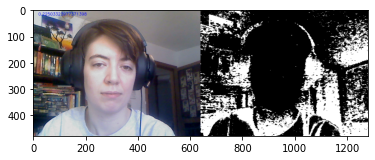

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
rgb = cv2.cvtColor(hori, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)